<a href="https://colab.research.google.com/github/parthava-adabala/learning/blob/main/02_PyTorch_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import sklearn
from sklearn.datasets import make_circles

In [3]:
X, y = make_circles(n_samples=1000, noise=0.03, random_state=42)
X[:5], y[:5]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]),
 array([1, 1, 1, 1, 0]))

In [4]:
import pandas as pd
df = pd.DataFrame({"x1": X[:, 0], "x2": X[:, 1], "target": y})
df.head()

,x1,x2,target
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


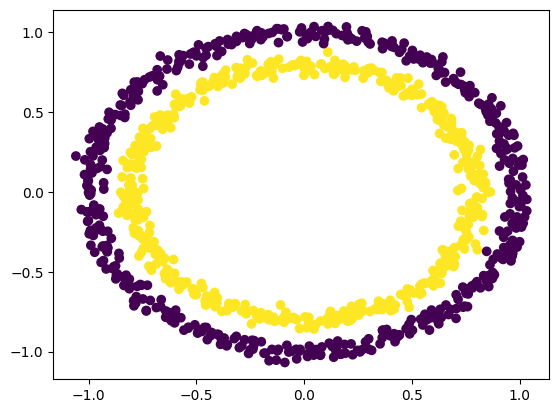

In [5]:
import matplotlib.pyplot as plt
plt.scatter(df["x1"], df["x2"], c=df["target"])
plt.show()

In [6]:
X.shape, y.shape

((1000, 2), (1000,))

# Start PyTorch

In [7]:
import torch
from torch import nn
torch.__version__

'2.8.0+cu126'

In [8]:
X = torch.tensor(X, dtype=torch.float)
y = torch.tensor(y, dtype=torch.float)
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [9]:
type(X), type(y), X.dtype, y.dtype

(torch.Tensor, torch.Tensor, torch.float32, torch.float32)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

# Build Model

In [12]:
device = "cuda" if torch.cuda.is_available() else "cpu"
X_train.to(device), X_test.to(device), y_train.to(device), y_test.to(device)
device

'cpu'

In [13]:
class CircleModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = torch.nn.Linear(in_features=2, out_features=10)
        self.layer_2 = torch.nn.Linear(in_features=10, out_features=10)
        self.layer_3 = torch.nn.Linear(in_features=10, out_features=1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.layer_3(self.layer_2(self.layer_1(x)))

model_0 = CircleModel().to(device)
model_0

CircleModel(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [14]:
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.0888, -0.2429],
                      [ 0.4729,  0.3148],
                      [ 0.2235, -0.4380],
                      [-0.2162, -0.6983],
                      [-0.5705, -0.6931],
                      [ 0.4235, -0.0630],
                      [-0.4420,  0.4992],
                      [ 0.0079,  0.4101],
                      [ 0.6781, -0.6511],
                      [ 0.6744, -0.0806]])),
             ('layer_1.bias',
              tensor([ 0.0896,  0.5745, -0.6605, -0.4256, -0.4818, -0.2790, -0.6444,  0.4243,
                       0.1040,  0.3923])),
             ('layer_2.weight',
              tensor([[ 0.2511, -0.0821, -0.0352, -0.2807,  0.2418, -0.1835, -0.0590,  0.0528,
                        0.2446,  0.1097],
                      [ 0.2051,  0.0264,  0.0704, -0.0660, -0.0804,  0.1306,  0.3026,  0.2873,
                        0.1475, -0.0568],
                      [ 0.2688,  0.1209,  0.1554, -0.2106,  0.0524, -0.2

In [15]:
next(model_0.parameters()).device

device(type='cpu')

In [16]:
# another way
model_1 = nn.Sequential(
    nn.Linear(in_features=2, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)).to(device)
model_1.state_dict()


OrderedDict([('0.weight',
              tensor([[-0.2323, -0.3990],
                      [-0.2399,  0.1032],
                      [ 0.4426, -0.5817],
                      [-0.2889,  0.6260],
                      [-0.2321, -0.3969],
                      [-0.0550,  0.6358],
                      [-0.6681,  0.4334],
                      [-0.0955, -0.1770],
                      [-0.3455,  0.6761],
                      [ 0.6242,  0.2474]])),
             ('0.bias',
              tensor([-0.0669, -0.0718,  0.0713,  0.4328, -0.5877,  0.2261,  0.2852, -0.3560,
                      -0.5994, -0.6899])),
             ('1.weight',
              tensor([[-0.1165, -0.0704, -0.2195,  0.2626,  0.1112,  0.2189,  0.0095, -0.0360,
                       -0.2992, -0.0912],
                      [ 0.2129,  0.0405,  0.0391,  0.2898,  0.1329,  0.0405, -0.0149,  0.2455,
                        0.0665,  0.1011],
                      [ 0.1420, -0.1382, -0.1933, -0.0810,  0.2017,  0.0062, -0.0943,  0.2

In [17]:
# Make predictions
with torch.inference_mode():
    y_untrained = model_0(X_test)
y_test[:5],torch.round(y_untrained[:5])

(tensor([1., 0., 1., 0., 1.]),
 tensor([[0.],
         [0.],
         [0.],
         [0.],
         [0.]]))

In [18]:
# set up loss fn
loss_fn = nn.BCEWithLogitsLoss()

# set up optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

In [19]:
# calculate accuracy
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, torch.round(y_pred)).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [20]:
y_logits = model_0(X_test)
y_logits[:5]

tensor([[0.1956],
        [0.1467],
        [0.2343],
        [0.1850],
        [0.0924]], grad_fn=<SliceBackward0>)

In [21]:
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs[:5]

tensor([[0.5487],
        [0.5366],
        [0.5583],
        [0.5461],
        [0.5231]], grad_fn=<SliceBackward0>)

In [22]:
y_preds = torch.round(y_pred_probs)

y_pred_laels = torch.round(torch.sigmoid(model_0(X_test)))

print(torch.eq(y_pred_laels, y_preds)[:5])

y_preds.squeeze()[:5]

tensor([[True],
        [True],
        [True],
        [True],
        [True]])


tensor([1., 1., 1., 1., 1.], grad_fn=<SliceBackward0>)

In [23]:
# Train model
torch.manual_seed(42)
epochs = 100
for epoch in range(epochs):
    model_0.train()

    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_train, y_pred)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_0.eval()
    with torch.inference_mode():
      test_logits = model_0(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits))
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_test, test_pred)

    if epoch % 10 == 0:
      print(f"Epoch: {epoch}, Loss: {loss:.5f}, Acc: {acc:.2f},  Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")




Epoch: 0, Loss: 0.69692, Acc: 50.00,  Test Loss: 0.69528, Test Acc: 50.00%
Epoch: 10, Loss: 0.69664, Acc: 50.00,  Test Loss: 0.69496, Test Acc: 50.00%
Epoch: 20, Loss: 0.69640, Acc: 51.00,  Test Loss: 0.69468, Test Acc: 51.00%
Epoch: 30, Loss: 0.69619, Acc: 55.00,  Test Loss: 0.69443, Test Acc: 54.00%
Epoch: 40, Loss: 0.69601, Acc: 57.50,  Test Loss: 0.69422, Test Acc: 57.00%
Epoch: 50, Loss: 0.69584, Acc: 58.88,  Test Loss: 0.69402, Test Acc: 59.50%
Epoch: 60, Loss: 0.69569, Acc: 58.00,  Test Loss: 0.69386, Test Acc: 59.00%
Epoch: 70, Loss: 0.69556, Acc: 56.50,  Test Loss: 0.69371, Test Acc: 57.50%
Epoch: 80, Loss: 0.69544, Acc: 55.38,  Test Loss: 0.69357, Test Acc: 56.50%
Epoch: 90, Loss: 0.69534, Acc: 54.12,  Test Loss: 0.69346, Test Acc: 56.50%


In [24]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists")
else:
    print("Downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)


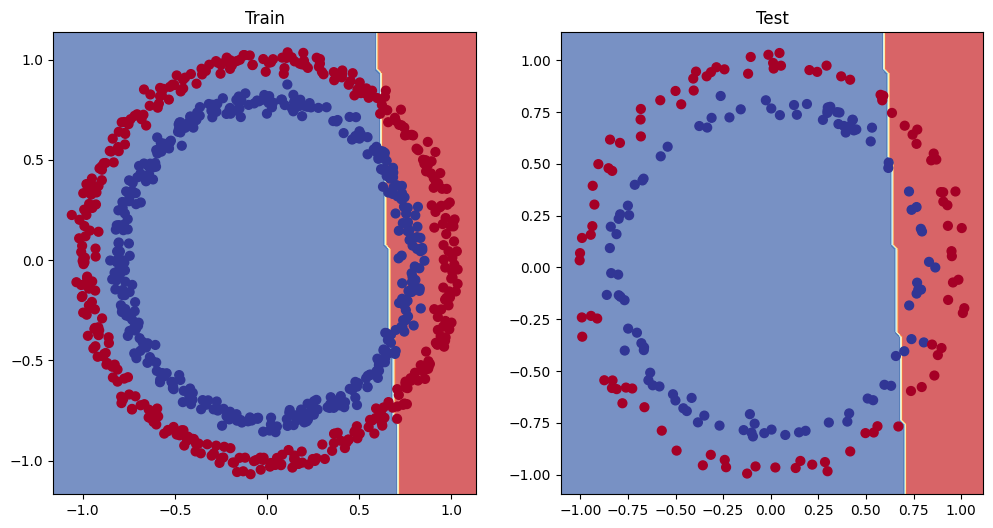

In [25]:
from helper_functions import plot_predictions, plot_decision_boundary

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

In [29]:
# Build model with non linearity
from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=20, bias=True)
  (layer_2): Linear(in_features=20, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [30]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(), lr=0.001)

In [31]:
torch.manual_seed(42)
epochs = 1000
for epoch in range(epochs):
    model_3.train()

    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_train, y_pred)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_3.eval()
    with torch.inference_mode():
      test_logits = model_3(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits))
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_test, test_pred)

    if epoch % 10 == 0:
      print(f"Epoch: {epoch}, Loss: {loss:.5f}, Acc: {acc:.2f},  Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

Epoch: 0, Loss: 0.69478, Acc: 43.88,  Test Loss: 0.69520, Test Acc: 44.50%
Epoch: 10, Loss: 0.69478, Acc: 44.00,  Test Loss: 0.69520, Test Acc: 44.50%
Epoch: 20, Loss: 0.69477, Acc: 44.00,  Test Loss: 0.69519, Test Acc: 45.00%
Epoch: 30, Loss: 0.69477, Acc: 44.00,  Test Loss: 0.69519, Test Acc: 45.00%
Epoch: 40, Loss: 0.69476, Acc: 44.38,  Test Loss: 0.69519, Test Acc: 45.50%
Epoch: 50, Loss: 0.69476, Acc: 44.62,  Test Loss: 0.69518, Test Acc: 46.00%
Epoch: 60, Loss: 0.69475, Acc: 44.75,  Test Loss: 0.69518, Test Acc: 46.00%
Epoch: 70, Loss: 0.69475, Acc: 44.75,  Test Loss: 0.69518, Test Acc: 46.50%
Epoch: 80, Loss: 0.69474, Acc: 44.62,  Test Loss: 0.69517, Test Acc: 46.50%
Epoch: 90, Loss: 0.69474, Acc: 44.62,  Test Loss: 0.69517, Test Acc: 47.00%
Epoch: 100, Loss: 0.69473, Acc: 44.75,  Test Loss: 0.69517, Test Acc: 47.50%
Epoch: 110, Loss: 0.69473, Acc: 44.88,  Test Loss: 0.69516, Test Acc: 47.50%
Epoch: 120, Loss: 0.69472, Acc: 44.88,  Test Loss: 0.69516, Test Acc: 47.50%
Epoch: 130

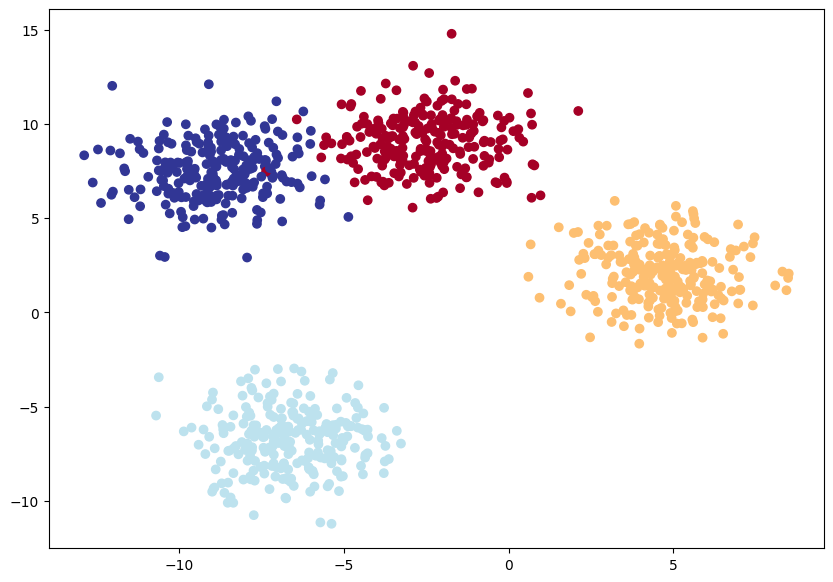

In [34]:
# Multi class classification

import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

X_blob, y_blob = make_blobs(n_samples=1000, n_features=NUM_FEATURES, centers=NUM_CLASSES, cluster_std=1.5, random_state=RANDOM_SEED)

X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

X_train, X_test, y_train, y_test = train_test_split(X_blob, y_blob, test_size=0.2, random_state=RANDOM_SEED)

plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)

In [35]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [36]:
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    """ Initialize multi class classfication model

    Args:
        input_features (int): Number of input features
        output_features (int): Number of output features
        hidden_units (int, optional): Number of hidden units. Defaults to 8.

    Returns:
        BlobModel: Multi class classification model

    Example:
        model = BlobModel(2, 4)
    """
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer_stack(x)

model_4 = BlobModel(input_features=2, output_features=4, hidden_units=8).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [37]:
# loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_4.parameters(), lr=0.1)

In [42]:
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_test.to(device))
  y_pred_probs = torch.softmax(y_logits, dim=1)

y_logits[:5]

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834]])

In [43]:
y_pred_probs[:5]

tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463]])

In [44]:
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds[:5]

tensor([1, 0, 0, 0, 0])

In [49]:
# train model
torch.manual_seed(42)
epochs = 100

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_4.train()

  y_logits = model_4(X_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_train, y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_test)
    test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_test, test_pred)

    if epoch % 10 == 0:
      print(f"Epoch: {epoch}, Loss: {loss:.5f}, Acc: {acc:.2f},  Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")


Epoch: 0, Loss: 0.02230, Acc: 99.25,  Test Loss: 0.01095, Test Acc: 99.50%
Epoch: 10, Loss: 0.02227, Acc: 99.25,  Test Loss: 0.01093, Test Acc: 99.50%
Epoch: 20, Loss: 0.02225, Acc: 99.25,  Test Loss: 0.01091, Test Acc: 99.50%
Epoch: 30, Loss: 0.02223, Acc: 99.25,  Test Loss: 0.01088, Test Acc: 99.50%
Epoch: 40, Loss: 0.02221, Acc: 99.25,  Test Loss: 0.01086, Test Acc: 99.50%
Epoch: 50, Loss: 0.02218, Acc: 99.25,  Test Loss: 0.01084, Test Acc: 99.50%
Epoch: 60, Loss: 0.02216, Acc: 99.25,  Test Loss: 0.01081, Test Acc: 99.50%
Epoch: 70, Loss: 0.02214, Acc: 99.25,  Test Loss: 0.01079, Test Acc: 99.50%
Epoch: 80, Loss: 0.02212, Acc: 99.25,  Test Loss: 0.01077, Test Acc: 99.50%
Epoch: 90, Loss: 0.02210, Acc: 99.25,  Test Loss: 0.01075, Test Acc: 99.50%


In [50]:
# evaluation
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_test)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
  print(f"Test Loss: {loss_fn(y_logits, y_test)}, Test Acc: {accuracy_fn(y_test, y_pred)}%")

Test Loss: 0.010727902874350548, Test Acc: 99.5%


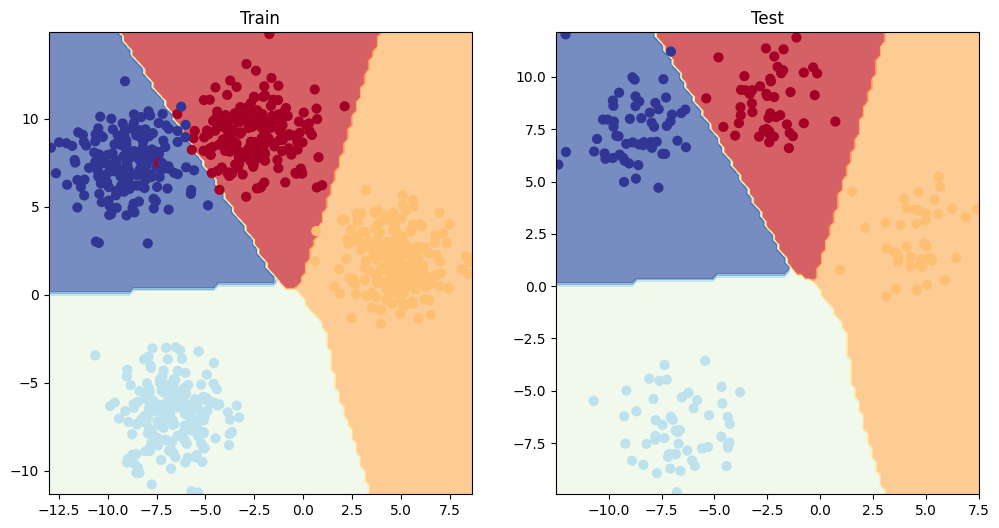

In [51]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_test, y_test)

In [52]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 24.9 MB/s eta 0:00:00


In [54]:
from torchmetrics import Accuracy

torchmetrics_acc = Accuracy(task="multiclass", num_classes=4)
torchmetrics_acc(y_pred, y_test)

tensor(0.9950)